In [97]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [98]:
iris = load_iris()
X = iris.data
y = iris.target
y_string = iris.target_names
y = [y_string[i] for i in y]

iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [99]:
type(y)

list

In [100]:
iris_df.describe(include=['O'])

,target
count,150
unique,3
top,setosa
freq,50


In [101]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.transform(y_test)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


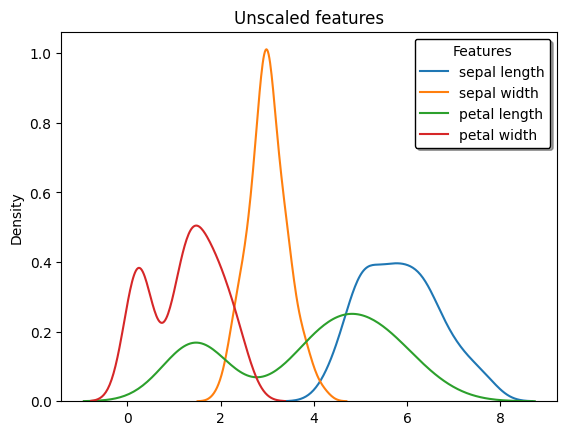

In [105]:
sns.kdeplot(data=X_train[:, 0], label='sepal length')
sns.kdeplot(data=X_train[:, 1], label='sepal width')
sns.kdeplot(data=X_train[:, 2], label='petal length')
sns.kdeplot(data=X_train[:, 3], label='petal width')
plt.title('Unscaled features')
plt.legend(title='Features', edgecolor='black', fancybox=True, shadow=True)
plt.show()

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [108]:
X_train_scaledd = pd.DataFrame(X_train_scaled,columns=['sepal length', 'sepal width', 'petal length','petal width'])

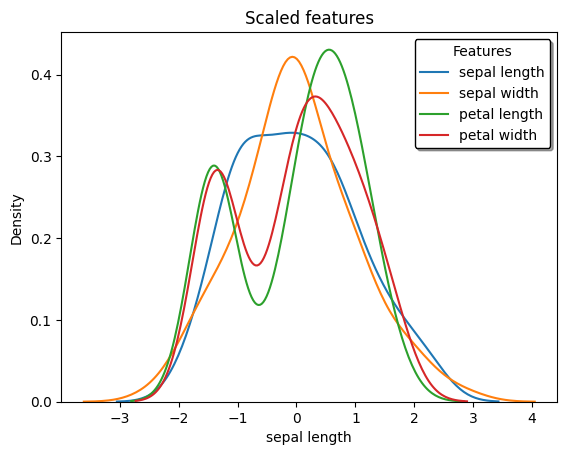

In [109]:
sns.kdeplot(data=X_train_scaledd['sepal length'], label='sepal length')
sns.kdeplot(data=X_train_scaledd['sepal width'], label='sepal width')
sns.kdeplot(data=X_train_scaledd['petal length'], label='petal length')
sns.kdeplot(data=X_train_scaledd['petal width'], label='petal width')

plt.title('Scaled features')
plt.legend(title='Features', edgecolor='black', fancybox=True, shadow=True)
plt.show()

In [110]:
X_train =X_train_scaled
X_test=X_test_scaled

In [111]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, TensorBoard

In [112]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
tensorboard = TensorBoard(log_dir='C:\machine\ANN', histogram_freq=0, write_graph=True, write_images=True)

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=4)) 
model.add(Dense(units=32, activation='relu')) 
model.add(Dense(units=16, activation='relu')) 
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_onehot, epochs=100, batch_size=8,validation_split=0.1, verbose=2, validation_data=(X_test_scaled, y_test_onehot), callbacks=[early_stopping, tensorboard])

Epoch 1/100
14/14 - 1s - loss: 1.2156 - accuracy: 0.3429 - val_loss: 1.1763 - val_accuracy: 0.2889 - 885ms/epoch - 63ms/step
Epoch 2/100
14/14 - 0s - loss: 1.0912 - accuracy: 0.3333 - val_loss: 1.0270 - val_accuracy: 0.4222 - 61ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 0.9619 - accuracy: 0.6571 - val_loss: 0.8901 - val_accuracy: 0.6889 - 86ms/epoch - 6ms/step
Epoch 4/100
14/14 - 0s - loss: 0.8423 - accuracy: 0.7810 - val_loss: 0.7472 - val_accuracy: 0.7778 - 57ms/epoch - 4ms/step
Epoch 5/100
14/14 - 0s - loss: 0.7293 - accuracy: 0.7905 - val_loss: 0.6318 - val_accuracy: 0.8000 - 56ms/epoch - 4ms/step
Epoch 6/100
14/14 - 0s - loss: 0.6289 - accuracy: 0.7810 - val_loss: 0.5374 - val_accuracy: 0.8000 - 54ms/epoch - 4ms/step
Epoch 7/100
14/14 - 0s - loss: 0.5566 - accuracy: 0.7905 - val_loss: 0.4820 - val_accuracy: 0.8222 - 53ms/epoch - 4ms/step
Epoch 8/100
14/14 - 0s - loss: 0.4975 - accuracy: 0.8095 - val_loss: 0.4363 - val_accuracy: 0.8222 - 54ms/epoch - 4ms/step
Epoch 9/100
14

In [113]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                80        
                                                                 
 dense_29 (Dense)            (None, 32)                544       
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 3)                 51        
                                                                 
Total params: 1203 (4.70 KB)
Trainable params: 1203 (4.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_onehot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


2/2 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 1.0000
Test Loss: 0.016141090542078018, Test Accuracy: 1.0


Text(0.5, 1.0, 'Training and Validation Loss')

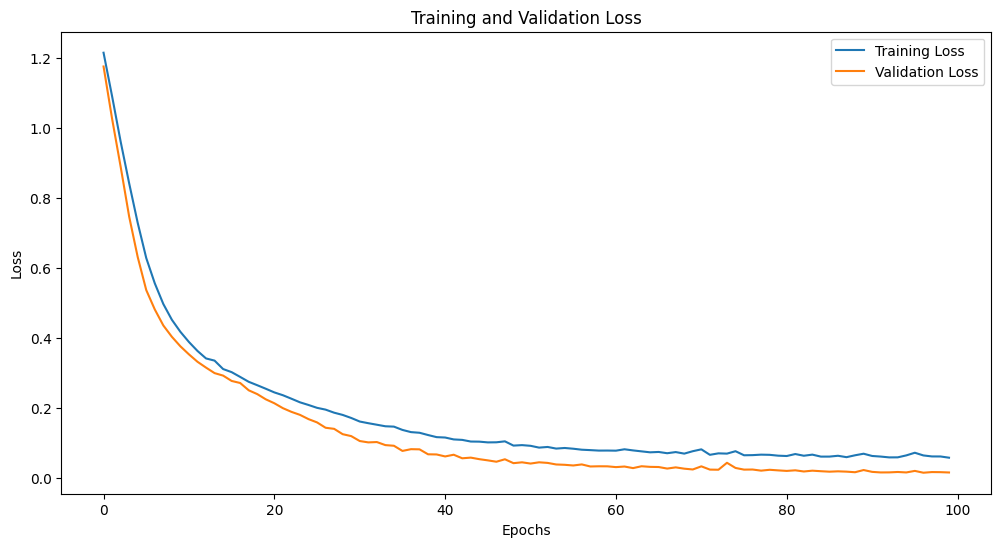

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

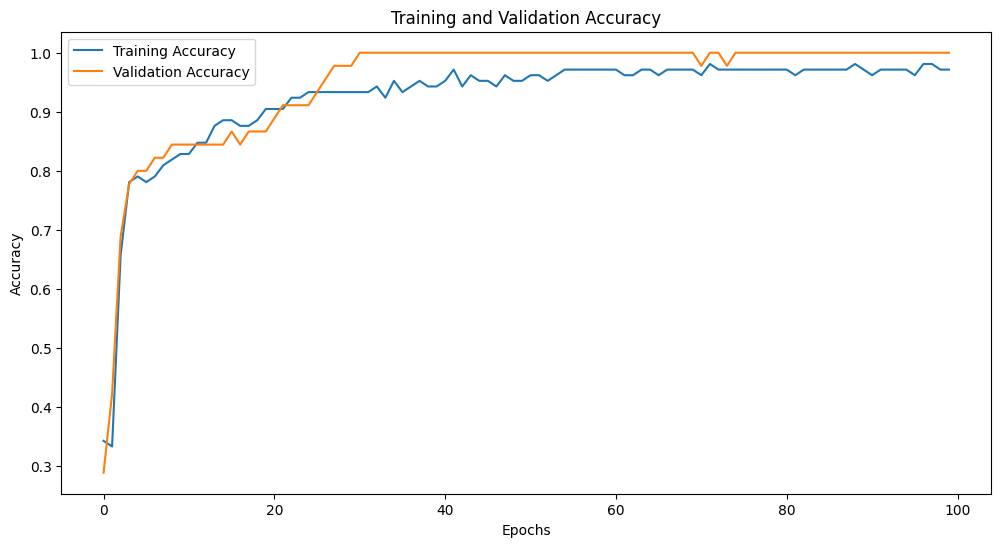

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [118]:
label_encoder = LabelEncoder()
y_testt = label_encoder.fit_transform(y_test)
y_testt

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [119]:
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)

2/2 [==============================] - 0s 2ms/step


In [120]:
predicted_classes

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [121]:
report = classification_report(y_testt, predicted_classes)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

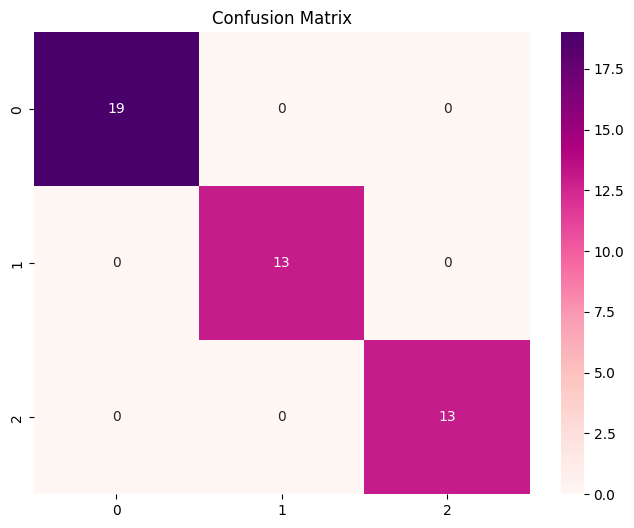

In [125]:
conf_matrix = confusion_matrix(y_testt, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='RdPu')
plt.title('Confusion Matrix')
plt.show()